<a href="https://colab.research.google.com/github/D-girl-11t/Topic-Modelling-and-Text-Summarization/blob/master/Topic_Modelling_and_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#for an app 

Preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Book1.csv')

In [2]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,replyContent
0,gp:AOqpTOGmzryKoTq6-mZ8W1WP_9ZiBMc0xwxWhgV3qAl...,A Google user,Now i understand why this app doesnt work espe...,1,64,Hi !\n\nWe are sorry to know about your exper...
1,gp:AOqpTOGb5zfpkCQxWpuI_xWXQ7RpYlX3oWx0SHFSRaQ...,Mahendra,(1) It is difficut typing password or OTP in t...,3,1298,Hi Mahendra !\n\nWe are sorry to know about yo...
2,gp:AOqpTOHstM-8Oi3QAWiui6hLdTtBCao0rIEZ2NprIP6...,Bela Rani,"Earlier I use it very nicely,, but since few m...",1,846,Hi Bela !\n\nWe are sorry to know about your e...
3,gp:AOqpTOFu6XRVE7ny6VQVsmW5PHEv_d3G12W9xwmxPDH...,SARTHAK MAYEKAR,"Hello, I did the same but it says ""no accounts...",1,554,Hi Sarthak !\n\nYou can change transaction rig...
4,gp:AOqpTOF_JnxnCLm5il_nxskJ0WPnH6e3sErGu7LSfMf...,TUTOR SQUARE,I use various banking apps for my business. Bu...,1,71,NaN


In [3]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer,LancasterStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
!pip install emoji --quiet
import emoji
!pip install contractions --quiet
import contractions
import re
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import sys
from pprint import pprint
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

def cleaning(text):
  text= text.lower()
  text= emoji.demojize(text)
  text=contractions.fix(text)
  text=text.strip()
  text=text.replace('[^\w\s]','')
  text=re.sub(r'http\S+', '', text)
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
  BAD_SYMBOLS_RE = re.compile('[^0-9a-z +]')
  text = REPLACE_BY_SPACE_RE.sub(' ' , text)
  text = BAD_SYMBOLS_RE.sub(' ',text)
  clean_text = ' '
  STOPWORDS = set(stopwords.words('english'))
  for word in text.split():
    if word not in STOPWORDS:
      clean_text = clean_text + word + ' '
  
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#data_cleaning

In [5]:
gg=df['content'].apply(cleaning)
STOPWORDS = set(stopwords.words('english'))
import re, string, unicodedata
ff=[]
for i in gg:
  text=unicodedata.normalize('NFKD', i).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  ff.append(text)
dd=pd.DataFrame(ff)

In [6]:
def sent_to_words(sentences):
    for sent in sentences:
        
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = dd.values.tolist()
data_words = list(sent_to_words(data))

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in STOPWORDS] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in STOPWORDS] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!
data_ready

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['understand',
  'app',
  'work',
  'especially',
  'non',
  'banking',
  'hour',
  'need',
  'app',
  'refuse',
  'help',
  'great',
  'developer',
  'team',
  'rather',
  'accept',
  'feedback',
  'bring',
  'positive',
  'change',
  'point',
  'finger',
  'back',
  'customer',
  'say',
  'check',
  'network',
  'customer',
  'idiot',
  'know',
  'use',
  'know',
  'network',
  'issue',
  'thank',
  'tell',
  'know',
  'network'],
 ['character',
  'hide',
  'form',
  'dot',
  'security',
  'reason',
  'visibility',
  'button',
  'make',
  'sure',
  'correct',
  'password',
  'otp',
  'enter',
  'text',
  'properly',
  'visible',
  'app',
  'developer',
  'want',
  'set',
  'device',
  'text',
  'size',
  'suitable',
  'app',
  'want',
  'change',
  'device',
  'text',
  'size',
  'app'],
 ['early',
  'use',
  'nicely',
  'month',
  'back',
  'later',
  'ever',
  'log',
  'say',
  'device',
  'number',
  'visit',
  'branch',
  'many',
  'time',
  'instead',
  'resolution',
  'issue',

In [7]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
bow_corpus = [id2word.doc2bow(text) for text in data_ready]

In [8]:
bow_doc_990 = bow_corpus[990]
for i in range(len(bow_doc_990)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_990[i][0], 
                                               id2word[bow_doc_990[i][0]], 
bow_doc_990[i][1]))

Word 1 ("app") appears 1 time.
Word 25 ("say") appears 1 time.
Word 71 ("number") appears 2 time.
Word 76 ("try") appears 1 time.
Word 82 ("even") appears 1 time.
Word 136 ("go") appears 1 time.
Word 145 ("register") appears 3 time.
Word 178 ("keep") appears 1 time.
Word 267 ("mobile") appears 2 time.
Word 845 ("record") appears 1 time.


#optimal number of topics

In [9]:
import warnings
def compute_lda_coherence_values(stop, start,num_topics):
    
    coherence_values = []
    model_list = []
    
   
    for num_topics in range(start, stop):
        warnings.filterwarnings("ignore", category=DeprecationWarning)
        model = gensim.models.LdaMulticore(bow_corpus, num_topics=num_topics, id2word=id2word,passes=10,workers=2)
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, texts=data_ready, dictionary=id2word, coherence='c_v')
       # warnings.filterwarnings("ignore", category=DeprecationWarning)

        coherence_values.append(coherencemodel.get_coherence())
    print(coherence_values)
    return model_list, coherence_values

In [10]:
def plot_lda_graph(start, stop, num_topics):
    
    model_list, coherence_values = compute_lda_coherence_values(stop, start, num_topics)
    # Show graph
    x = range(start, stop)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

[0.2624006817003168, 0.2898395254833438, 0.29781000572760985, 0.29210372652552613, 0.31712384122569715, 0.305276352471856, 0.31338745205274116, 0.2860892121727767, 0.31931629026481434, 0.2925980156229076]


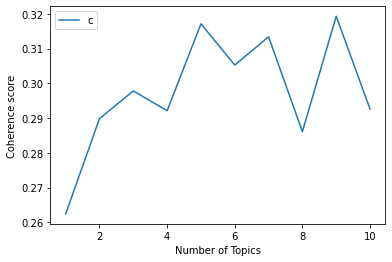

In [11]:
import matplotlib.pyplot as plt
start,stop=1,11
num_topics=stop

plot_lda_graph(start,stop,num_topics)

#

In [12]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=9, id2word=id2word, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.030*"try" + 0.029*"time" + 0.017*"app" + 0.016*"unable" + 0.015*"error" + 0.014*"account" + 0.012*"say" + 0.011*"work" + 0.011*"technical" + 0.011*"transfer"
Topic: 1 
Words: 0.026*"try" + 0.026*"account" + 0.016*"open" + 0.016*"even" + 0.015*"show" + 0.014*"app" + 0.013*"issue" + 0.013*"transaction" + 0.013*"get" + 0.013*"error"
Topic: 2 
Words: 0.033*"app" + 0.022*"time" + 0.020*"work" + 0.018*"problem" + 0.016*"try" + 0.015*"transaction" + 0.015*"show" + 0.013*"account" + 0.012*"issue" + 0.012*"use"
Topic: 3 
Words: 0.036*"app" + 0.022*"try" + 0.022*"use" + 0.021*"open" + 0.018*"problem" + 0.017*"time" + 0.016*"show" + 0.016*"issue" + 0.015*"update" + 0.015*"account"
Topic: 4 
Words: 0.029*"app" + 0.023*"time" + 0.022*"account" + 0.016*"open" + 0.016*"work" + 0.014*"error" + 0.013*"use" + 0.012*"number" + 0.012*"try" + 0.012*"bank"
Topic: 5 
Words: 0.039*"app" + 0.028*"account" + 0.023*"try" + 0.019*"time" + 0.017*"issue" + 0.016*"bad" + 0.016*"say" + 0.015*"bank"

In [13]:
dd=pd.DataFrame(columns=['num'])
cc1=[]
for index, score in sorted(lda_model[bow_corpus[1]], key=lambda tup: -1*tup[1]):
  for inn, t in lda_model.show_topics(-1):
    if t==lda_model.print_topic(index, 10):
      cc1.append(inn)
      #ff=pd.Series(cc1)
      #dd=pd.concat([dd,ff],axis=1)
print(cc1)

[4]


In [14]:
ss=[]
for i in range(1000):
  
  cc=[]
  
  for index, score in sorted(lda_model[bow_corpus[i]], key=lambda tup: -1*tup[1]):
    
   # print("\nScore: {}\t \words: {}".format(score, lda_model.print_topic(index, 10)))
    for ind, t in lda_model.show_topics(-1):
      if (t==lda_model.print_topic(index)):

       # print("Topic_num:{}".format(inn))
        cc.append(ind)
        #ff=pd.Series(cc)
  ss.append(cc)

       # dd=dd.append(cc)
  print(cc)
print(ss)

[8]
[4]
[1]
[4]
[6]
[6]
[6]
[4, 5]
[6]
[3]
[5]
[4]
[6]
[5]
[3, 1, 5]
[2]
[3, 2]
[4, 6, 2, 7]
[5, 3]
[5, 6]
[4]
[2]
[3, 5]
[5, 8]
[8]
[7]
[5]
[6, 2]
[4]
[6, 3]
[1]
[8, 5, 6]
[5]
[6]
[8]
[8]
[3]
[8, 1]
[6]
[2]
[5]
[3, 2, 4, 6]
[8]
[7, 6]
[5]
[5]
[6]
[5]
[5]
[6]
[7, 6]
[4, 6]
[1]
[2, 8]
[0]
[1]
[2]
[8]
[4, 2]
[4]
[8, 0, 2]
[6, 5, 2]
[7, 5]
[0]
[4, 1]
[2]
[5, 2]
[4]
[7]
[8]
[2]
[3]
[6]
[7, 2]
[1]
[8]
[4]
[5]
[6, 3]
[5]
[7]
[4]
[2]
[3, 2]
[0, 5]
[2]
[2]
[4, 3, 8]
[8]
[6]
[3]
[5, 0]
[5]
[1]
[6]
[4, 3]
[7]
[6]
[0, 3, 7]
[8, 6]
[3]
[1]
[3]
[0, 6]
[5]
[7, 6]
[5]
[8, 0, 6]
[0]
[2]
[1, 8]
[5]
[5]
[4]
[2]
[6]
[2]
[2]
[2]
[5, 6]
[1]
[4, 1]
[1, 4]
[3]
[5]
[6, 3]
[2, 5]
[5]
[1]
[7, 3]
[8]
[2]
[7]
[3]
[4, 6, 8]
[3]
[7, 2]
[4]
[2]
[8]
[8, 6]
[1]
[3]
[3]
[2]
[4, 2]
[1]
[4, 7]
[8]
[8, 5]
[4]
[4]
[6]
[0, 7]
[1, 6]
[2]
[2]
[4]
[4]
[5]
[2]
[8, 5]
[8]
[0, 5]
[8]
[6]
[5, 1]
[3]
[5]
[8, 1]
[5]
[6]
[2]
[4]
[7]
[4]
[3]
[6]
[5, 3]
[5]
[8]
[2]
[5, 7]
[4]
[4]
[5, 1]
[1]
[8, 5]
[2]
[3]
[5]
[7]
[3]
[8, 5]
[7]
[8]
[3,

In [26]:
xx=pd.DataFrame(columns=['topic_num'],index=list(range(1000)))
for i in range(1000):
  print(ss[i])
  str1 = ','.join(str(e) for e in ss[i])
 # rr=pd.Series(str1)
  #print(str1)
  xx['topic_num'][i]=list(str1)

[8]
[4]
[1]
[4]
[6]
[6]
[6]
[4, 5]
[6]
[3]
[5]
[4]
[6]
[5]
[3, 1, 5]
[2]
[3, 2]
[4, 6, 2, 7]
[5, 3]
[5, 6]
[4]
[2]
[3, 5]
[5, 8]
[8]
[7]
[5]
[6, 2]
[4]
[6, 3]
[1]
[8, 5, 6]
[5]
[6]
[8]
[8]
[3]
[8, 1]
[6]
[2]
[5]
[3, 2, 4, 6]
[8]
[7, 6]
[5]
[5]
[6]
[5]
[5]
[6]
[7, 6]
[4, 6]
[1]
[2, 8]
[0]
[1]
[2]
[8]
[4, 2]
[4]
[8, 0, 2]
[6, 5, 2]
[7, 5]
[0]
[4, 1]
[2]
[5, 2]
[4]
[7]
[8]
[2]
[3]
[6]
[7, 2]
[1]
[8]
[4]
[5]
[6, 3]
[5]
[7]
[4]
[2]
[3, 2]
[0, 5]
[2]
[2]
[4, 3, 8]
[8]
[6]
[3]
[5, 0]
[5]
[1]
[6]
[4, 3]
[7]
[6]
[0, 3, 7]
[8, 6]
[3]
[1]
[3]
[0, 6]
[5]
[7, 6]
[5]
[8, 0, 6]
[0]
[2]
[1, 8]
[5]
[5]
[4]
[2]
[6]
[2]
[2]
[2]
[5, 6]
[1]
[4, 1]
[1, 4]
[3]
[5]
[6, 3]
[2, 5]
[5]
[1]
[7, 3]
[8]
[2]
[7]
[3]
[4, 6, 8]
[3]
[7, 2]
[4]
[2]
[8]
[8, 6]
[1]
[3]
[3]
[2]
[4, 2]
[1]
[4, 7]
[8]
[8, 5]
[4]
[4]
[6]
[0, 7]
[1, 6]
[2]
[2]
[4]
[4]
[5]
[2]
[8, 5]
[8]
[0, 5]
[8]
[6]
[5, 1]
[3]
[5]
[8, 1]
[5]
[6]
[2]
[4]
[7]
[4]
[3]
[6]
[5, 3]
[5]
[8]
[2]
[5, 7]
[4]
[4]
[5, 1]
[1]
[8, 5]
[2]
[3]
[5]
[7]
[3]
[8, 5]
[7]
[8]
[3,

In [27]:
xx

,topic_num
0,[8]
1,[4]
2,[1]
3,[4]
4,[6]
...,...
995,[7]
996,[1]
997,[6]
998,"[6, ,, 3, ,, 1, ,, 4, ,, 0, ,, 5, ,, 2, ,, 7, ..."


In [28]:
final= pd.concat([df,xx],axis=1)
final.head()


,reviewId,userName,content,score,thumbsUpCount,replyContent,topic_num
0,gp:AOqpTOGmzryKoTq6-mZ8W1WP_9ZiBMc0xwxWhgV3qAl...,A Google user,Now i understand why this app doesnt work espe...,1,64,Hi !\n\nWe are sorry to know about your exper...,[8]
1,gp:AOqpTOGb5zfpkCQxWpuI_xWXQ7RpYlX3oWx0SHFSRaQ...,Mahendra,(1) It is difficut typing password or OTP in t...,3,1298,Hi Mahendra !\n\nWe are sorry to know about yo...,[4]
2,gp:AOqpTOHstM-8Oi3QAWiui6hLdTtBCao0rIEZ2NprIP6...,Bela Rani,"Earlier I use it very nicely,, but since few m...",1,846,Hi Bela !\n\nWe are sorry to know about your e...,[1]
3,gp:AOqpTOFu6XRVE7ny6VQVsmW5PHEv_d3G12W9xwmxPDH...,SARTHAK MAYEKAR,"Hello, I did the same but it says ""no accounts...",1,554,Hi Sarthak !\n\nYou can change transaction rig...,[4]
4,gp:AOqpTOF_JnxnCLm5il_nxskJ0WPnH6e3sErGu7LSfMf...,TUTOR SQUARE,I use various banking apps for my business. Bu...,1,71,NaN,[6]


#Visualization using pyLDAvis

In [19]:
pip install pyLDAvis


     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 22.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=ff55100fa651448e222119dc441dee7beaf4cff7cad805cc009c3df48da16d8f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=09af6354c5bcb5205cb7d2b6133b00140146a685695e86a2ac2ae3265db3cfa5
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [20]:
import pyLDAvis
import pyLDAvis.gensim
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model,bow_corpus,id2word)   #for first app only
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.000403  0.038284       1        1  15.716478
6     -0.048269 -0.024738       2        1  15.349229
5      0.017197  0.029426       3        1  15.154208
8     -0.033963 -0.032224       4        1  11.138372
2     -0.016639 -0.000724       5        1  10.181694
3     -0.035602  0.036463       6        1   9.229051
1      0.048202  0.059097       7        1   8.921201
7     -0.035830 -0.048018       8        1   8.454273
0      0.105307 -0.057565       9        1   5.855493, topic_info=            Term        Freq       Total Category  logprob  loglift
76           try  445.000000  445.000000  Default  30.0000  30.0000
79       account  346.000000  346.000000  Default  29.0000  29.0000
193       update  230.000000  230.000000  Default  28.0000  28.0000
1            app  819.000000  819.000000  Default  27.0000  27.0000
225  application  110.000000  110.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
94   transaction   10.304123  150.846832   Topic9  -4.8284   0.1541
40          make    8.219616  116.955978   Topic9  -5.0544   0.1825
211         take    7.149119   89.149521   Topic9  -5.1940   0.3145
225  application    7.147984  110.020920   Topic9  -5.1941   0.1039
82          even    6.690815  181.422180   Topic9  -5.2602  -0.4623

[733 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1382      1  0.820042  aadhaar
110       1  0.135387     able
110       2  0.262312     able
110       3  0.160772     able
110       4  0.050770     able
...     ...       ...      ...
109       3  0.113915     yono
109       4  0.113915     yono
109       5  0.113915     yono
109       6  0.056958     yono
109       7  0.056958     yono

[1721 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 9, 3, 4, 2, 8, 1])

#grouping according to topicwise

In [32]:
for i in range(9):
  globals()['_topic'+str(int(i))]= pd.DataFrame()

In [39]:
for a in range(1000):
  for b in final['topic_num'][a:a+1]:
    for c in b:
      if (c!=','):
        c=int(c)
        if(c==0):
          ssdl0=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl0)
        
        elif(c==1):
          
          ssdl1=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl1)
        elif(c==2):
          
          ssdl2=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl2)
        elif(c==3):
          
          ssdl3=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl3)
        elif(c==4):
          
          ssdl4=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl4)
        elif(c==5):
          
          ssdl5=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl5)
        elif(c==6):
          
          ssdl6=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl6)
        elif(c==7):
          
          ssdl7=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl7)
        else:
          
          ssdl8=final.iloc[a:a+1,[2]]
          globals()['_topic'+str(int(c))]=globals()['_topic'+str(int(c))].append(ssdl8)
        






In [40]:
_topic0

,content
54,I wanted to transfer money and struggled 3 hou...
60,Had to change my one star rating. Managed to l...
63,The application is very slow and most of the t...
84,"Broken app , trying to make new account says N..."
91,"Worst app ever , like there net banking trying..."
...,...
978,Now a days yono is having problem.. It's usele...
980,Such a pathetic app i have ever seen. None of ...
985,"Since Yesterday not able to login , error code..."
993,"The app was very helpful in the past. But, hav..."


creating corpus and summarizing

In [41]:
def corpus(text):
  #for j in range(1000):
    
  s='.'
  s=s.join(text)
    
  return s

In [43]:
for c in range(9):
  globals()['_corpus'+str(int(c))] = corpus(globals()['_topic'+str(int(c))]['content'])

In [54]:
from gensim.summarization.summarizer import summarize 

for c in range(9):
  print(c)
  globals()['_summary_'+str(int(c))]=summarize(globals()['_corpus'+str(int(c))],ratio=0.5)

0
1
2
3
4
5
6
7
8


In [55]:
_summary_0

'I did reset my username as well as password and profile password to get full rights for transfer above 20000rs but I got stuck with "Technical error, please try again later".\nCan SBI team solve this Technical error issue please?\nWhat can\'t you understand about "technical error on login".\nAre you all really t.The application is very slow and most of the time it is not working.\n"Unable to process, please try later" is the display observerd on the screen!\nAfter I log out, the screen becomes blank and after sometime the login page appears and I am asked if I want to exit.\nConstantly the application is updated but there is no improvement in subsequent updates..Broken app , trying to make new account says NetBanking password needs to be a certain way even after I have followed all rules.\nNow it says sorry try again later we were unable to process while taking adress .\nSo long process for just simply opening an account imagine how well net banking must work..Worst app ever , like th

final summary

In [64]:
_2liner_=summarize(_summary_0+'.'+_summary_1+
                   '.'+_summary_2+
                   '.'+_summary_3+
                   '.'+_summary_4+
                   '.'+_summary_5+
                   '.'+_summary_6+
                   '.'+_summary_7+
                   '.'+_summary_8,ratio=0.2)

In [65]:
_2liner_

'Constantly the application is updated but there is no improvement in subsequent updates..Broken app , trying to make new account says NetBanking password needs to be a certain way even after I have followed all rules.\nWhat if there\'s in am emergency , can not depend on this app only , if possible please fix this issue asap Thanks.sent an email to appfeedback yono they replied we will update you when we will resolve the issue and its been more than 2 weeks i havent recieved any email from thm yet its not working already registered a complaint no one is giving reply.\nPlease resolve the issue asap..Rubbish application ,always shows technical error while login,I was trying to login since a month but unable to logged in.i have deleted it many times and installed it but always disappointed .plz improve the performance of your application and solve the issue .I want to check transaction and transfer money .do needful and clear your technical issues as soon as possible .SBI yono lite is go